# HSE Lab

## Linear regression

This project was part of my Linear Algebra university course and that is why mathematical introduction, explanations and conclusions are written in Russian.
In code blocks, my variables may have meaningless names. I intentionally did it to match the same variables in formulas above.

### Least squares method

Рассмотрим систему уравнений $Xa = y$, в которой $a$ --- столбец неизвестных. Её можно переписать в векторном виде
$$x_1 a_1 + x_2 a_2 + \ldots + x_k a_k = y,$$
где $x_1,\ldots,x_n$ --- столбцы матрицы $X$. Таким образом, решить исходную систему означает найти линейную комбинацию векторов $x_1,\ldots,x_n$, равную правой части. Но что делать, если такой линейной комбинации не существует? Геометрически это означает, что вектор $y$ не лежит в подпространстве $U = \langle x_1,\ldots, x_k\rangle$. В этом случае мы можем найти *псевдорешение*: вектор коэффициентов $\hat{a}$, для которого линейная комбинация $x_1 \hat{a}_1 + x_2 \hat{a}_2 + \ldots + x_k \hat{a}_k$ хоть и не равна в точности $y$, но является наилучшим приближением --- то есть ближайшей к $y$ точкой $\hat{y}$ подпространства $U$ (иными словами, ортогональной проекцией $y$ на это подпростанство). Итак, цель наших исканий можно сформулировать двумя эквивалентными способами:

1. Найти вектор $\hat{a}$, для которого длина разности $|X\hat{a} - y|$ минимальна (отсюда название "метод наименьших квадратов");
2. Найти ортогональную проекцию $\hat{y}$ вектора $y$ на подпространство $U$ и представить её в виде $X\hat{a}$.

Далее мы будем предполагать, что векторы $x_1,\ldots,x_n$ линейно независимы (если нет, то сначала имеет смысл выделить максимальную линейно независимую подсистему).

На лекциях было показано, что проекция вектора $y$ на подпространство $U = \langle x_1,\ldots, x_k\rangle$, записывается в виде
$$\hat{y} = X\left(X^TX\right)^{-1}X^Ty,$$
и, соответственно, искомый вектор $\hat{a}$ равен
$$\hat{a} = \left(X^TX\right)^{-1}X^Ty.$$

### Linear regression problem

Начнём с примера. Допустим, вы хотите найти зависимость среднего балла S студента ФКН от его роста H, веса W, длины волос L и N - количества часов, которые он ежедневно посвящает учёбе. Представьте, что мы измерили все эти параметры для $n$ студентов и получили наборы значений: $S_1,\ldots, S_n$, $H_1,\ldots, H_n$ и так далее.

Тут можно подбирать много разных умных моделей, но начать имеет смысл с самой простой, линейной:
$$S = a_1H + a_2W + a_3L + a_4N + a_5.$$
Конечно, строгой линейной зависимости нет (иначе можно было бы радостно упразднить экзамены), но мы можем попробовать подобрать коэффициенты $a_1, a_2, a_3, a_4, a_5$, для которых отклонение правой части от наблюдаемых было бы наименьшим:
$$\sum_{i=1}^n\left(S_i - ( a_1H_i + a_2W_i + a_3L_i + a_4N_i + a_5)\right)^2 \longrightarrow \min$$
И сразу видно, что мы получили задачу на метод наименьших квадратов! А именно, у нас
$$X =
\begin{pmatrix}
H_1 & W_1 & L_1 & N_1 & 1\\
H_2 & W_2 & L_2 & N_2 & 1\\
\dots & \dots & \dots & \dots & \dots \\
H_n & W_n & L_n & N_n & 1
\end{pmatrix},\qquad y=
\begin{pmatrix}
S_1\\ S_2\\ \vdots \\ S_n
\end{pmatrix}$$

Решая эту задачу с помощью уже известных формул, получаем оценки коэффициентов $\hat{a}_i$ ($i = 1\ldots,5$).

Теперь проговорим общую постановку задачи линейной регрессии. У нас есть $k$ переменных $x_1,\ldots,x_k$ ("регрессоров"), через которые мы хотим выразить "объясняемую переменную" $y$:
$$y = a_1x_1 + a_2x_2 + \ldots + a_kx_k$$
Значения всех переменных мы измерили $n$ раз (у $n$ различных объектов,  в $n$ различных моментов времени - это зависит от задачи). Подставим эти данные в предыдущее равенство:
$$\begin{pmatrix}
y_1\\ y_2 \\ \vdots \\ y_n
\end{pmatrix} = 
a_1\begin{pmatrix}
x_{11} \\ x_{21} \\ \vdots \\ x_{n1} \end{pmatrix} + a_2\begin{pmatrix}
x_{12} \\ x_{22} \\ \vdots \\ x_{n2} \end{pmatrix} + \ldots + a_k\begin{pmatrix}
x_{1k} \\ x_{2k} \\ \vdots \\ x_{nk} \end{pmatrix}$$
(здесь $x_{ij}$ - это значение $j$-го признака на $i$-м измерении). Это удобно переписать в матричном виде:
$$\begin{pmatrix}
x_{11} & x_{12} & \ldots & x_{1k}\\
x_{21} & x_{22} & \ldots & x_{2k}\\
\dots & \dots & \dots & \dots\\
x_{n1} & x_{n2} & \ldots & x_{nk}
\end{pmatrix} \cdot
\begin{pmatrix}
a_1 \\ a_2 \\ \vdots \\ a_k
\end{pmatrix} = 
\begin{pmatrix}
y_1 \\ y_2 \\ \vdots \\ y_n
\end{pmatrix}$$
или коротко $Xa = y$. Поскольку на практике эта система уравнений зачастую не имеет решения (ибо зависимости в жизни редко бывают действительно линейными), методом наименьших квадратов ищется псевдорешение.

### Quality estimation. Training and testing

После того, как вы построили регрессию и получили какую-то зависимость объясняемой переменной от регрессоров, настаёт время оценить качество регрессии. Есть много разных функционалов качества; мы пока будем говорить только о самом простом и очевидном из них: о среднеквадратичной ошибке (mean square error). Она равна
$$\frac1{n}|X\hat{a} - y|^2 = \frac1{n}\sum_{i=1}^n\left(\hat{a}_1x_{i1} + \hat{a}_2x_{i2} + \ldots + \hat{a}_kx_{ik} - y_i\right)^2$$

В целом, хочется искать модели с наименьшей mean square error на имеющихся данных. Однако слишком фанатичная гонка за минимизацией ошибки может привести к печальным последствиям. Например, если мы приближаем функцию одной переменной по значениям в $n$ точках, то наилучшей с точки зрения этой ошибки моделью будет многочлен $(n-1)$-й степени, для которого эта ошибка будет равна нулю.  Тем не менее, вряд ли истинная зависимость имеет вид многочлена большой степени. Более того, значения вам скорее всего даны с погрешностью, то есть вы подогнали вашу модель под свои зашумлённые данные, но на любых других данных (то есть в других точках) точность, скорее всего, окажется совсем не такой хорошей. Этот эффект называют **overfitting**; говорят также, что **обобщающая способность** модели оказалась скверной.

Чтобы не попадать в эту ловушку, данные обычно делят на обучающие (по которым строят модель и оценивают коэффициенты) и тестовые. Лучшей стоит счесть ту модель, для которой значение функционала качества будет меньше.

### Task 1. Least squares method

Скачайте файлы ``train.txt`` и ``test.txt``. В первом из них находится обучающая выборка, а во втором - тестовая. Каждый из файлов содержит два столбца чисел, разделённых пробелами: в первом - $n$ точек (значения аргумента $x$), во втором - значения некоторой функции $y = f(x)$ в этих точках, искажённые случайным шумом. Ваша задача - по обучающей выборке подобрать функцию $y = g(x)$, пристойно приближающую неизвестную вам зависимость.

Загрузим обучающие и тестовые данные (не забудьте ввести правильный путь!).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import copy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error

In [2]:
data_train = np.loadtxt('train.txt', delimiter=',')
data_test = np.loadtxt('test.txt', delimiter=',')

Разделим значения $x$ и $y$

In [4]:
X_train = np.matrix(data_train[:, 0])
y_train = np.matrix(data_train[:, 1]).T

# Do the same for test data:

X_test = np.matrix(data_test[:, 0])
y_test = np.matrix(data_test[:, 1]).T

Найдите с помощью метода наименьших квадратов линейную функцию ($y = kx + b$), наилучшим образом приближающую неизвестную зависимость. Полезные функции: ``numpy.ones(n)`` для создания массива из единиц длины $n$ и ``numpy.concatenate((А, В), axis=1)`` для слияния двух матриц по столбцам (пара ``А`` и ``В`` превращается в матрицу ``[A B]``).

In [5]:
k = np.matrix((np.ones(X_train.shape[1])))
X = np.array(np.concatenate((X_train.T, k.T), axis=1))
a = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T, X)), X.T), y_train)

Нарисуйте на плоскости точки $(x_i, y_i)$ и полученную линейную функцию. Глядя на данные, подумайте, многочленом какой степени можно было бы лучше всего приблизить эту функцию. Найдите этот многочлен и нарисуйте его график.

2.279134498051949x + 4.433230905064934


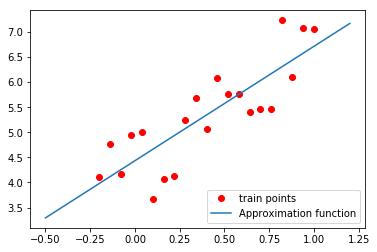

In [6]:
xv = np.linspace(-0.5, 1.2, 2)
print(a.item([0][0]), "x + ", a.item([1][0]), sep="")
myline = a.item([0][0]) * xv + a.item([1][0])
pointsx = [X_train.item([x][0]) for x in range(X_train.shape[1])]
pointsy = [y_train.item([y][0]) for y in range(y_train.shape[0])]
plt.plot(pointsx, pointsy, 'ro', label='train points')
plt.plot(xv, myline, label = 'Approximation function')
plt.legend(loc='lower right')
plt.show()

Для $k = 1,2,3,\ldots,10$ найдите многочлен $\hat{f}_k$ степени $k$, наилучшим образом приближающий неизвестную зависимость. Для каждого из них найдите среднеквадратическую ошибку на обучающих данных и на тестовых данных: $\frac1{n}\sum_{i=1}^n\left( \hat{f}_k(x_i) - y_i \right)^2$ (в первом случае сумма ведётся по парам $(x_i, y_i)$ из обучающих данных, а во втором - по парам из тестовых данных).

Для $k = 1,2,3,4,6$ напечатайте коэффициенты полученных многочленов и нарисуйте их графики на одном чертеже вместе с точками $(x_i, y_i)$ (возможно, график стоит сделать побольше; это делается командой `plt.figure(figsize=(width, height))`).

In [7]:
def f(p, x):
    res = 0
    for i in range(p.shape[0]):
        res = p.item([i][0]) + res * x  # Horner's method
    return res

k = 1 	 mse_train = 0.2968966332625196 	 mse_test = 0.43512020040488775    	 diff = 0.13822356714236816
Coefficients from lowest to higher:
[[2.2791345  4.43323091]]


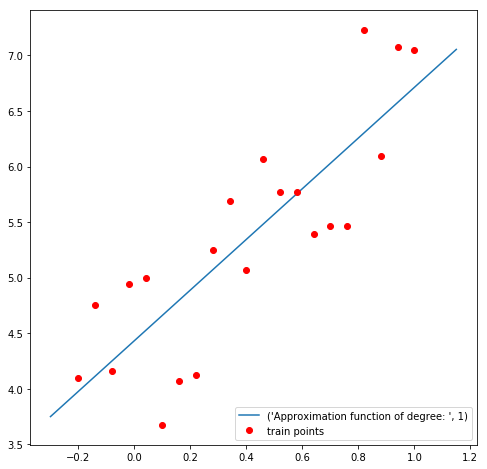

k = 2 	 mse_train = 0.2696989158766914 	 mse_test = 0.35647628878312143    	 diff = 0.08677737290643
Coefficients from lowest to higher:
[[1.40162851 1.15783169 4.4724765 ]]


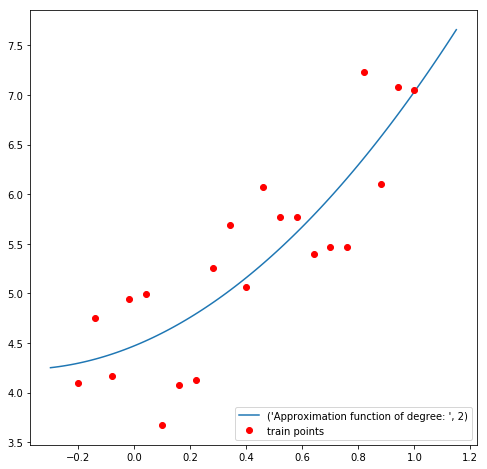

k = 3 	 mse_train = 0.26949718714796106 	 mse_test = 0.3553464571518489    	 diff = 0.08584927000388787
Coefficients from lowest to higher:
[[-0.3817686   1.85975084  1.06501611  4.46073636]]


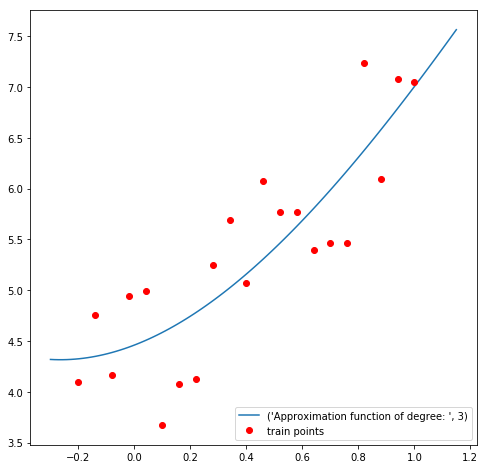

k = 4 	 mse_train = 0.26106653305792754 	 mse_test = 0.4417270189272489    	 diff = 0.18066048586932137
Coefficients from lowest to higher:
[[  7.9184747  -13.05132812   6.79409178   1.17180239   4.34116612]]


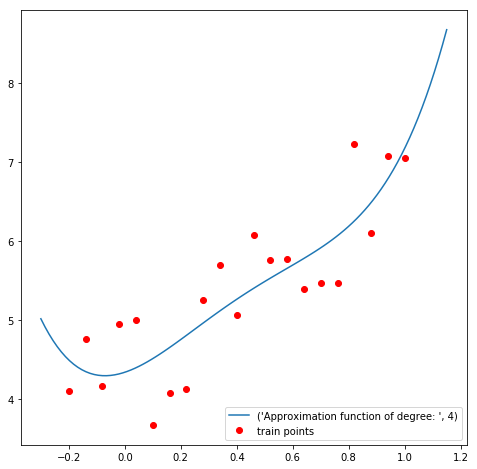

k = 5 	 mse_train = 0.2499850464831752 	 mse_test = 0.5579732021587919    	 diff = 0.30798815567561666
Coefficients from lowest to higher:
[[ 29.52497804 -51.13148139  21.37479628   3.2747144   -0.13059804
    4.43129781]]


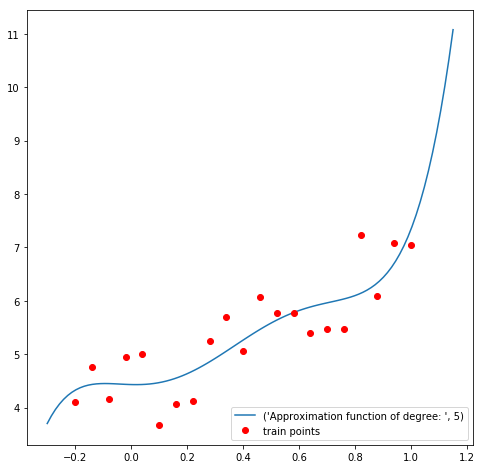

k = 6 	 mse_train = 0.1882934898837029 	 mse_test = 2.5816929326681683    	 diff = 2.3933994427844656
Coefficients from lowest to higher:
[[-229.9701334   581.45329819 -481.51013284  121.25709712   16.00290399
    -4.59717932    4.38379501]]


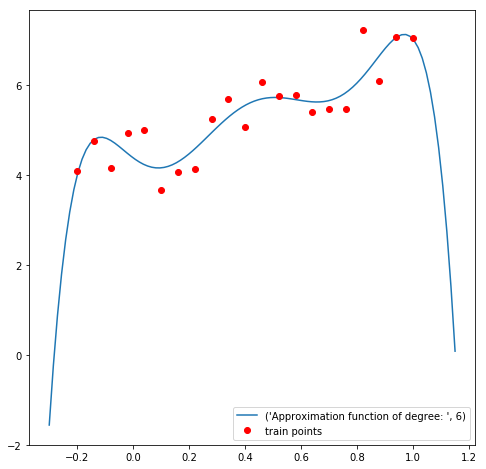

k = 7 	 mse_train = 0.1853962115329449 	 mse_test = 2.515782902103749    	 diff = 2.3303866905708044
k = 8 	 mse_train = 0.1590555657908933 	 mse_test = 4.35728885199025    	 diff = 4.198233286199357
k = 9 	 mse_train = 0.15847184274994286 	 mse_test = 4.776328568215587    	 diff = 4.617856725465644
k = 10 	 mse_train = 0.15316610998651578 	 mse_test = 14.632025214985175    	 diff = 14.478859104998659


In [8]:
tmp = data_train[:, 0]
Xi = np.matrix((np.ones(X_train.shape[1]))).T
for i in range(1, 11):
    tt = np.array([tmp ** i])
    Xi = np.array(np.concatenate((tt.T, Xi), axis=1))
    ai = np.matmul(np.matmul(np.linalg.inv(np.matmul(Xi.T, Xi)), Xi.T), y_train)
    
    # Calculating MSE (Mean squared error)
    mse_train = 0
    for j in range(X_train.shape[1]):
        mse_train += (f(ai, X_train.item([j][0])) - y_train.item([j][0])) ** 2
    mse_train *= 1/(X_train.shape[1])
    mse_test = 0
    for j in range(X_test.shape[1]):
        mse_test += (f(ai, X_test.item([j][0])) - y_test.item([j][0])) ** 2
    mse_test *= 1/(X_test.shape[1])
    print("k =", i, "\t mse_train =", mse_train, "\t mse_test =", mse_test, "   \t diff =", mse_test - mse_train)
    
    if i <= 6:
        print("Coefficients from lowest to higher:")
        print(ai.T)
        pl_x = np.linspace(-0.3, 1.15, 100)
        pl_y = f(ai, pl_x)
        plt.figure(figsize=(8, 8))
        plt.plot(pl_x, pl_y, label=('Approximation function of degree: ', i))
        pointsx = [X_train.item([x][0]) for x in range(X_train.shape[1])]
        pointsy = [y_train.item([y][0]) for y in range(y_train.shape[0])]
        plt.plot(pointsx, pointsy, 'ro', label='train points')
        plt.legend(loc='lower right')
        plt.show()

Что происходит с ошибкой при росте степени многочлена? Казалось бы, чем больше степень, тем более сложным будет многочлен и тем лучше он будет приближать нашу функцию. Подтверждают ли это ваши наблюдения? Как вам кажется, чем объясняется поведение ошибки на тестовых данных при $k = 10$?

**Ответ:** с ростом степени многочлена величина ошибки растет, поскольку многочлен подстаривается под тренировочный набор и все менее точно отражает настоящую зависимость нашего набора данных. Таким образом, при $k = 10$, ошибка на тренировочном наборе становится минимальной (0.1531661099), а на тестовых, напротив, максимальной (14.63202521).
Наименьшая же разница ошибок на тренировочных и тестовых данных наблюдается при $k = 3$. Наименьшая ошибка на тестовых данных так же при $k = 3$.

### Task 2. Linear regression

Скачайте файлы ``flats_moscow_mod.txt`` и ``flats_moscow_description.txt``. В первом из них содержатся данные о квартирах в Москве. Каждая строка содержит шесть характеристик некоторой квартиры, разделённые знаками табуляции; в первой строке записаны кодовые названия характеристик. Во втором файле приведены краткие описания признаков. Вашей задачей будет построить с помощью метода наименьших квадратов (линейную) зависимость между ценой квартиры и остальными доступными параметрами.

С помощью известных вам формул найдите регрессионные коэффициенты. Какой смысл имеют их знаки? Согласуются ли они с вашими представлениями о жизни?

Оцените качество приближения, вычислив среднеквадратическую ошибку.

In [9]:
flats_data_train = np.loadtxt('flats_moscow_mod.txt', delimiter='\t')
y = flats_data_train[:, 0]  # 'price'
x = flats_data_train[:, 1:] # everything else

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

k = np.matrix((np.ones(X_train.shape[0])))
X = np.array(np.concatenate((X_train, k.T), axis=1))
a = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T, X)), X.T), y_train.T)
X_t = np.array(np.concatenate((X_test, np.matrix((np.ones(X_test.shape[0]))).T), axis=1))
print(a)

[  1.50592246   1.32591493   2.07801758  -3.45754795  -1.30314818
 -13.56375539]


Получившаяся зависимость имеет вид $1.505 totsp + 1.325 livesp + 2.078 kitsp -3.457 dist -1.303 metrdist -13.563$. Больше всего (смотрим по абсолютному значению) цена квартиры зависит от расстояния до центра и площади кухни (еда превыше всего, конечно). Меньше всего - от расстояния до метро (ну в принципе 15 минут пешочком утром пережить можно да и полезно, чтобы взбодриться и сжечь калории, набранные на кухне, так что будем рассматривать этот фактор в последнюю очередь). Положительный знак перед признаком означает, что чем больше значение признака, тем выше цена кваритиры, отрицательный знак - наоборот: чем меньше значение признака, тем выше цена квартиры. Все вполне согласуется с реальностью, как мне кажется

In [10]:
def my_mean_squared_error(a, y, X):
    mse = 0
    for i in range(X.shape[0]):
        val = 0
        for j in range(a.shape[0]):
            val += a[j] * X[i][j] 
        mse += (val - y[i]) ** 2
    mse *= 1/(X.shape[0])
    return mse
mse_train = my_mean_squared_error(a, y_train, X)
mse_test = my_mean_squared_error(a, y_test, X_t)
print("mse_train =", mse_train, " \t mse_test =", mse_test)

mse_train = 863.1784099407217  	 mse_test = 1059.913530999778


### Improving the model

Конечно, никто не гарантирует, что объясняемая переменная (цена квартиры) зависит от остальных характеристик именно линейно. Зависимость может быть, например, квадратичной или логарифмической; больше того, могут быть важны не только отдельные признаки, но и их комбинации. Это можно учитывать, добавляя в качестве дополнительных признаков разные функции от уже имеющихся характеристик: их квадраты, логарифмы, попарные произведения.

В этом задании вам нужно постараться улучшить качество модели, добавляя дополнительные признаки, являющиеся функциями от уже имеющихся. Но будьте осторожны: чрезмерное усложнение модели будет приводить к переобучению. 

**Model comparison**

Когда вы построите новую модель, вам захочется понять, лучше она или хуже, чем изначальная. Проверять это на той же выборке, на которой вы обучались, бессмысленно и даже вредно (вспомните пример с многочленами: как прекрасно падала ошибка на обучающей выборке с ростом степени!). Поэтому вам нужно будет разделить выборку на обучающую и тестовую. Делать это лучше случайным образом (ведь вы не знаете, как создатели датасета упорядочили объекты); рекомендуем вам для этого функцию `sklearn.model_selection.train_test_split`.

In [11]:
# Feature and coefficients playground #

sp = np.matrix((X_train[:, 0] + X_train[:, 1] + 2 * X_train[:, 2]) ** 3)  # (totsp + livesp + 2*kitsp)**3
logdist = np.matrix((X_train[:, 3] + X_train[:, 4]) ** 0.5)  # (dist + metrdist) ** 0.5
nm = np.matrix(X_train[:, 3] * X_train[:, 4])  # (dist * metrdist)
mm = np.matrix(X_train[:, 2] * X_train[:, 0])  # (kitsp * totsp)
new_X = np.array(np.concatenate((X_train, sp.T, logdist.T, nm.T, mm.T), axis=1))
new_X = np.array(np.concatenate((new_X, np.matrix((np.ones(X_train.shape[0]))).T), axis=1))
new_a = np.matmul(np.matmul(np.linalg.inv(np.matmul(new_X.T, new_X)), new_X.T), y_train.T)

sp_t = np.matrix((X_test[:, 0] + X_test[:, 1] + 2 * X_test[:, 2]) ** 3)
logdist_t = np.matrix((X_test[:, 3] + X_test[:, 4]) ** 0.5)
nm_t = np.matrix(X_test[:, 3] * X_test[:, 4])
mm_t = np.matrix(X_test[:, 2] * X_test[:, 0])
newX_t = np.array(np.concatenate((X_test, sp_t.T, logdist_t.T, nm_t.T, mm_t.T), axis=1))
newX_t = np.array(np.concatenate((newX_t, np.matrix((np.ones(X_test.shape[0]))).T), axis=1))


In [12]:
clf3 = LinearRegression(fit_intercept=False).fit(X, y_train)
clf4 = LinearRegression(fit_intercept=False).fit(new_X, y_train)

In [13]:
print(clf3.coef_)
print(clf4.coef_)

[  1.50592246   1.32591493   2.07801758  -3.45754795  -1.30314818
 -13.56375539]
[ 1.13094464e+00  2.69429885e-01  8.78863544e+00  6.56516250e+00
  8.99279141e+00  1.53608386e-05 -6.97952547e+01 -1.88839945e-01
 -1.01372704e-01  1.52730488e+02]


In [15]:
print('Sklearn Train_Before MSE:', mean_squared_error(y_train, clf3.predict(X)))
print('Sklearn Test_Before MSE:', mean_squared_error(y_test, clf3.predict(X_t)))
print('Sklearn Train_After MSE:', mean_squared_error(y_train, clf4.predict(new_X)))
print('Sklearn Test_After MSE:', mean_squared_error(y_test, clf4.predict(newX_t)))
print('My Train_After MSE:', my_mean_squared_error(new_a, y_train, new_X))
print('My Test_After MSE:', my_mean_squared_error(new_a, y_test, newX_t))

Sklearn Train_Before MSE: 863.1784099407236
Sklearn Test_Before MSE: 1059.9135309997778
Sklearn Train_After MSE: 810.7519736572178
Sklearn Test_After MSE: 895.2356375823234
My Train_After MSE: 810.7519736572181
My Test_After MSE: 895.2356375831185


Добавлю следующие признаки:
$(totsp + livesp + 2kitsp)^{3} \\
(dist + metrdist)^{0.5} \\ 
(dist \cdot metrdist) \\
(kitsp \cdot totsp) \\
(livesp)^{4}
$

Наибольшее улучшение модели произошло благодаря последним двум признакам.

Интересно, а нам разрешено было удалять исходные признаки? А вообще грустно, что нам обновили только файл с описанием данных, а сами данные не обновили :(( Играться с признаками было бы веселее

In [16]:
# Testing new model and estimating improvement #

res_train = []
res_test = []
n = 1000
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
    k = np.matrix((np.ones(X_train.shape[0])))
    X = np.array(np.concatenate((X_train, k.T), axis=1))
    sp = np.matrix((X_train[:, 0] + X_train[:, 1] + 2 * X_train[:, 2]) ** 3)
    logdist = np.matrix((X_train[:, 3] + X_train[:, 4]) ** 0.5)
    nm = np.matrix(X_train[:, 3] * X_train[:, 4])
    mm = np.matrix(X_train[:, 2] * X_train[:, 0])
    xd = np.matrix((X_train[:, 1]) ** 4)
    new_X = np.array(np.concatenate((X_train, sp.T, logdist.T, nm.T, mm.T, xd.T), axis=1))
    new_X = np.array(np.concatenate((new_X, np.matrix((np.ones(X_train.shape[0]))).T), axis=1))
    new_a = np.matmul(np.matmul(np.linalg.inv(np.matmul(new_X.T, new_X)), new_X.T), y_train.T)

    sp_t = np.matrix((X_test[:, 0] + X_test[:, 1] + 2 * X_test[:, 2]) ** 3)
    logdist_t = np.matrix((X_test[:, 3] + X_test[:, 4]) ** 0.5)
    nm_t = np.matrix(X_test[:, 3] * X_test[:, 4])
    mm_t = np.matrix(X_test[:, 2] * X_test[:, 0])
    xd_t = np.matrix((X_test[:, 1]) ** 4)
    newX_t = np.array(np.concatenate((X_test, sp_t.T, logdist_t.T, nm_t.T, mm_t.T, xd_t.T), axis=1))
    newX_t = np.array(np.concatenate((newX_t, np.matrix((np.ones(X_test.shape[0]))).T), axis=1))
    
    res_train.append(my_mean_squared_error(new_a, y_train, new_X))
    res_test.append(my_mean_squared_error(new_a, y_test, newX_t))
print("train_before:", mse_train, "\t test_before:", mse_test)
print("\n \t After 1000 iterations we have: \n")
print("train_avg:", sum(res_train)/n, "\t train_max:", max(res_train), "\t train_min:", min(res_train))
print("%improve_train_avg:", (1 - (sum(res_train)/n)/mse_train) * 100, " \t %best_improve:", (1 - min(res_train)/mse_train) * 100)
print()
print("test_avg:", sum(res_test)/n, " \t test_max:", max(res_test), " \t test_min:", min(res_test))
print("%improve_test_avg:", (1 - (sum(res_test)/n)/mse_test) * 100, " \t %best_improve:", (1 - min(res_test)/mse_test) * 100)
print()
print("%improve_other_avg:", (1 - (sum(res_train)/n)/924) * 100, ",", (1 - (sum(res_test)/n)/924) * 100)

train_before: 863.1784099407217 	 test_before: 1059.913530999778

 	 After 1000 iterations we have: 

train_avg: 753.8231102423669 	 train_max: 861.6581632055196 	 train_min: 607.055315219035
%improve_train_avg: 12.668910440642833  	 %best_improve: 29.67209232437542

test_avg: 806.102567879204  	 test_max: 1239.3376980084108  	 test_min: 579.7911226118063
%improve_test_avg: 23.94638389804905  	 %best_improve: 45.298262013420064

%improve_other_avg: 18.41741231143216 , 12.759462350735495


In average new model gives about 12% improvement on train data set and 24% improvement on test data set. 

### Task 3. Regularization. 

Вспомним, что задача линейной регрессии формулируется как задача нахождения проекции вектора значений объясняемой переменной $y$ на линейную оболочку $\langle x_1,\ldots,x_k\rangle$ векторов значений регрессоров. Если векторы $x_1,\ldots,x_k$ линейно зависимы, то матрица $X^TX$ вырожденна и задача не будет решаться (то есть будет, но не с помощью приведённой выше формулы). В жизни, по счастью, различные признаки редко бывают *в точности* линейно зависимы, однако во многих ситуациях они скоррелированы и становятся "почти" линейно зависимыми. Таковы, к примеру, зарплата человека, его уровень образования, цена машины и суммарная площадь недвижимости, которой он владеет. В этом случае матрица $X^TX$ будет близка к вырожденной, и это приводит к численной неустойчивости и плохому качеству решений; как следствие, будет иметь место переобучение. Один из симптомов этой проблемы - необычно большие по модулю компоненты вектора $a$.

Есть много способов борьбы с этим злом. Один из них - регуляризация. Сейчас мы рассмотрим одну из её разновидностей --- **L2-regularization**. Идея в том, чтобы подправить матрицу $X^TX$, сделав её "получше". Например, это можно сделать, заменив её на $(X^TX + \lambda E)$, где $\lambda$ --- некоторый скаляр. Пожертвовав точностью на обучающей выборке, мы тем не менее получаем численно более стабильное псевдорешение $a = (X^TX + \lambda E)^{-1}X^Ty$ и снижаем эффект переобучения. Параметр $\lambda$ нужно подбирать, и каких-то универсальных способов это делать нет, но зачастую можно его подобрать таким, чтобы ошибка на тестовой выборке падала. 

Теперь давайте вспомним первую задачу. Если вы её сделали, то помните, что ошибка аппроксимации многочленом шестой степени довольно высокая. Убедитесь, что, используя регуляризацию с хорошо подобранным коэффициентом $\lambda$, ошибку на тестовой выборке можно сделать не больше, чем для многочлена оптимальной степени в модели без регрессии. Для этого $\lambda$ сравните $\det(X^TX)$ и $\det(X^TX + \lambda E)$.

In [17]:
X_train = np.matrix(data_train[:, 0])
y_train = np.matrix(data_train[:, 1]).T
X_test = np.matrix(data_test[:, 0])
y_test = np.matrix(data_test[:, 1]).T

ans = []
t = -1
print("Coefficient =", t)
print()
tmp_2 = data_train[:, 0]
Xi_2 = np.matrix((np.ones(X_train.shape[1]))).T
det_before = 0
det_after = 0
for i in range(1, 11):
    tt_2 = np.array([tmp_2 ** i])
    Xi_2 = np.array(np.concatenate((tt_2.T, Xi_2), axis=1))
    xtx = np.matmul(Xi_2.T, Xi_2)
    ai_2_no = np.matmul(np.matmul(np.linalg.inv(xtx), Xi_2.T), y_train)
    ai_2 = np.matmul(np.matmul(np.linalg.inv(xtx - t * np.eye(xtx.shape[0])), Xi_2.T), y_train)
    mse_train_2 = 0
    for j in range(X_train.shape[1]):
        mse_train_2 += (f(ai_2, X_train.item([j][0])) - y_train.item([j][0])) ** 2
    mse_train_2 *= 1/(X_train.shape[1])

    mse_test_2 = 0
    for j in range(X_test.shape[1]):
        mse_test_2 += (f(ai_2, X_test.item([j][0])) - y_test.item([j][0])) ** 2
    mse_test_2 *= 1/(X_test.shape[1])
    print("k =", i, "\t mse_train_2 =", mse_train_2, "\t mse_test_2 =", mse_test_2, "  \t diff =", mse_test_2 - mse_train_2)
    if i == 6:
        det_before = np.linalg.det(xtx)
        det_after = np.linalg.det(xtx - t * np.eye(xtx.shape[0]))
        pl_x_2 = np.linspace(-0.3, 1.15, 100)
        pl_y_2 = f(ai_2, pl_x_2)
        pl_y_2_no = f(ai_2_no, pl_x_2)
print()
print("det without regularization", det_before, " \t det with regularization", det_after)

Coefficient = -1

k = 1 	 mse_train_2 = 0.3415526305150493 	 mse_test_2 = 0.404287009194863   	 diff = 0.06273437867981368
k = 2 	 mse_train_2 = 0.31222705028447084 	 mse_test_2 = 0.3027033800584491   	 diff = -0.009523670226021741
k = 3 	 mse_train_2 = 0.3144711960793258 	 mse_test_2 = 0.293324829447128   	 diff = -0.021146366632197766
k = 4 	 mse_train_2 = 0.3173082949716485 	 mse_test_2 = 0.2974359267709365   	 diff = -0.019872368200711976
k = 5 	 mse_train_2 = 0.31886405344795055 	 mse_test_2 = 0.30331263904372946   	 diff = -0.015551414404221087
k = 6 	 mse_train_2 = 0.3196110739903543 	 mse_test_2 = 0.308219923571227   	 diff = -0.011391150419127305
k = 7 	 mse_train_2 = 0.3199495546048587 	 mse_test_2 = 0.3117636451760249   	 diff = -0.008185909428833793
k = 8 	 mse_train_2 = 0.3200922473541476 	 mse_test_2 = 0.3140132325023869   	 diff = -0.006079014851760711
k = 9 	 mse_train_2 = 0.32014174166237686 	 mse_test_2 = 0.315128510461803   	 diff = -0.005013231200573842
k = 10 	 mse

На тестовой выборке среднеквадратическая ошибка для многочлена 6 степени (да и почти всех остальных) в модели с регуляризацией меньше среднеквадратической ошибки для многочлена 3 степени (0.35534645) в модели без регуляризации. А $\det(X^TX + \lambda E)$ больше $\det(X^TX)$ примерно в $10^{13}$ раз и довольно далёк от нуля.

Нарисуйте на одном чертеже графики многочленов шестой степени, приближающих неизвестную функцию, для модели с регуляризацией и без. Чем первый из них выгодно отличается от второго?

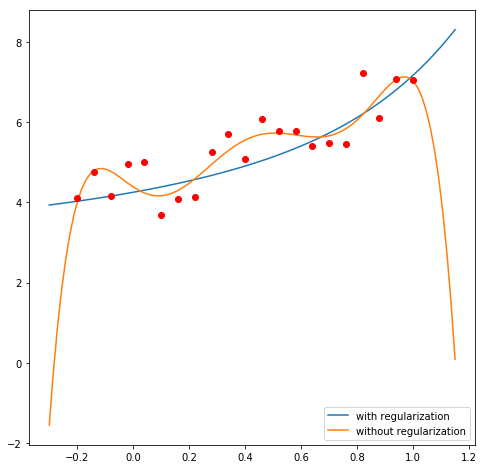

In [18]:
plt.figure(figsize=(8, 8))
plt.plot(pl_x_2, pl_y_2, label="with regularization")
plt.plot(pl_x_2, pl_y_2_no, label="without regularization")
plt.plot(X_train[0], y_train.T[0], 'ro')
plt.legend(loc='lower right')
plt.show()

**Ответ:** У графика в модели с регуляризацией отсутствует постоянная смена характера монотонности и ветви не меняют резко свое направление за пределами диапозона точек, а идут в том же направлении.

Попробуйте доказать, что вектор $a = (X^TX + \lambda E)^{-1}X^Ty$ является решением задачи

$$|Xa - y|^2 + \lambda|a|^2\rightarrow\min$$

Интуитивно это можно понимать так: мы ищем компромисс между минимизацией длины разности $|Xa - y|$ (то есть точностью решения задачи регрессии) и тем, чтобы компоненты вектора $a$ не становились слишком большими по модулю.

### Task 4. Online-learning of linear regression

Раньше мы работали в ситуации, когда объекты $x_i$ и значения $y_i$ даны с самого начала и всегда доступны. Допустим теперь, что пары $(x_i, y_i)$ поступают к нам по одной, и мы не можем себе позволить хранить их все в памяти (это может быть актуально, например, если вы пытаетесь обучить модель на устройстве со сравнительно небольшим количеством оперативной памяти: скажем, на мобильном телефоне или на бортовом компьютере спутника связи). В этом случае нам нужно уметь решать следующую задачу:

**Известно:** решение задачи регрессии для датасета $(x_1, y_1),\ldots,(x_t,y_t)$;

**На вход поступает:** новая пара $(x_{t+1}, y_{t+1})$;

**Требуется:** быстро (за время, не зависящее от $t$) отыскать решение задачи регрессии для расширенного датасета $(x_1, y_1),\ldots,(x_t,y_t),(x_{t+1}, y_{t+1})$.

Эту задачу мы будем решать в два этапа.

**Этап 1.** Обозначим $X_{(t)} = (x_1\ldots x_t)$ и $y_{(t)} = (y_1,\ldots,y_t)^T$. Тогда, как мы хорошо помним, решение задачи регрессии для датасета $(x_1, y_1),\ldots,(x_t,y_t)$ имеет вид $\hat{a}_{(t)} = \left(X^T_{(t)}X_{(t)}\right)^{-1}X^T_{(t)}y_{(t)}$. Размеры матриц $X^T_{(t)}X_{(t)}$ и $X^T_{(t)}y_{(t)}$ не зависят от $t$, поэтому их мы, пожалуй, можем себе позволить хранить в памяти.

И вот ваше первое задание в этом разделе: придумайте алгоритм, принимающий на вход матрицы $X^T_{(t)}X_{(t)}$ и $X^T_{(t)}y_{(t)}$, а также пару $(x_{t+1}, y_{t+1})$ и вычисляющий матрицы $X^T_{(t+1)}X_{(t+1)}$ и $X^T_{(t+1)}y_{(t+1)}$. Сложность вашего алгоритма не должна зависеть от $t$!

### QR decomposition

**QR-разложением** матрицы $A$ (не обязательно квадратной) мы будем называть её представление в виде $A = QR$, где $Q$ - матрица с ортонормированными столбцами, а $R$ - верхнетреугольная матрица.

Смысл QR-разложения следующий. Пусть $a_1,\ldots,a_m$ - столбцы матрицы $A$, $q_1,\ldots,q_t$ - столбцы матрицы $Q$. Тогда $q_1,\ldots,q_t$ - это ортонормированный базис в подпространстве, являющемся линейной оболочкой векторов $a_1,\ldots,a_m$, а в матрице $R$ записаны коэффициенты, с помощью которых $a_i$ выражаются через $q_1,\ldots,q_t$.

Находить QR-разложение заданной матрицы можно разными способами. Мы познакомим вас не с самым лучшим из них, но по крайней мере с наиболее простым концептуально. Заметим, что ортогональный базис линейной оболочки можно найти с помощью ортогонализации Грама-Шмидта. При этом коэффициенты из матрицы $R$ получаются в качестве побочного продукта этого процесса:

```python
for j = 1...n:
    q_j = a_j
    for i = 1,...,j-1:
        r_ij = (q_i, a_j)
        q_j = q_j - r_ij * q_i
    r_jj = |q_j|
    if r_jj == 0: # a_j in <a_1,...,a_j-1>
        # What would you do in this case?..
    q_j = q_j / r_jj
```

Для нахождения QR-разложения вы можете использовать библиотечную функцию `scipy.linalg.qr`.

Поскольку лабораторная про линейную регрессию, не так-то просто замять вопрос о том, какое же отношение QR-разложение имеет к задаче регрессии. Упомянем одно из возможных применений.

Допустим, мы нашли QR-разложение матрицы $X$, а именно: $X = QR$. Тогда
$$X^TX = (QR)^T(QR) = R^TQ^TQR = R^TR$$

Поскольку в задаче регрессии матрица $X$ обычного полного ранга (то есть её столбцы линейно независимы), матрица $R$ будет квадратной. Благодаря этому нашу обычную формулу для набора регрессионных коэффициентов $\hat{a}$ можно переписать в следующем виде:

$$\hat{a} = (X^TX)^{-1}X^Ty = (R^TR)^{-1}(QR)^Ty = R^{-1}(R^T)^{-1}R^TQ^Ty = R^{-1}Q^Ty$$

Как видите, формула стала проще. Более того, зачастую обращение матрицы $R$ может быть численно более устойчиво, чем обращение матрицы $X^TX$.